<a href="https://colab.research.google.com/github/nerdropy/Machine-Learning-Projects/blob/master/classification/first_project/classification_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import keras
from matplotlib import pyplot as plt

#fetching data
#url = 'https://raw.githubusercontent.com/nerdropy/Machine-Learning-Projects/master/classification/first_project/loan_data_set.csv?token=GHSAT0AAAAAACRLZWBUX4BUQXAPR6NBXXUUZROKR3Q'
df = pd.read_csv('loan_data_set.csv')
df.dropna(inplace=True)
#previewing data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


14


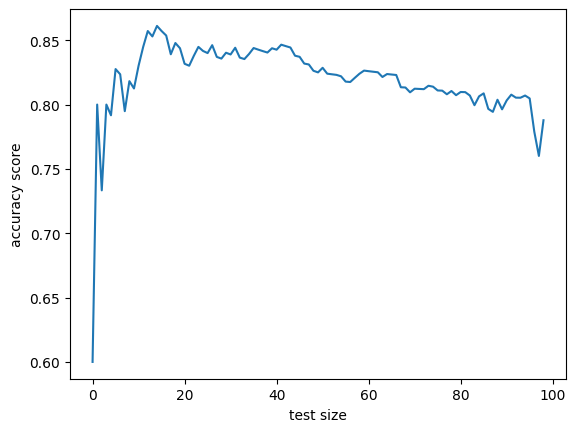

In [6]:
df1 = df.iloc[:, 3:11].copy()
df2 = df1.drop(['Education', 'Self_Employed'], axis=1).copy()
df2['Dependents'] = df2['Dependents'].str.replace('+', '')
df2['Dependents'] = pd.to_numeric(df2['Dependents'])
df2.dropna(inplace=True)

df3 = df['Loan_Status'].replace({"Y": 1, "N": 0}).copy()
X = df2
y = df3

arr = []
for i in range(1, 100):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=41, stratify=y)

  scaler = StandardScaler()

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.fit_transform(X_test)

  clf = SVC(kernel='linear', random_state=41)

  clf.fit(X_train_scaled, y_train)

  y_pred = clf.predict(X_test_scaled)

  accuracy = accuracy_score(y_test, y_pred)

  arr.append(accuracy)

print(arr.index(max(arr)))

arr_new = np.array(arr)
plt.plot(arr_new)
plt.xlabel('test size')
plt.ylabel('accuracy score')
plt.show()

In [19]:
df1 = df.iloc[:, 3:11].copy()
df2 = df1.drop(['Education', 'Self_Employed'], axis=1).copy()
df2['Dependents'] = df2['Dependents'].str.replace('+', '')
df2['Dependents'] = pd.to_numeric(df2['Dependents'])
df2.dropna(inplace=True)

df3 = df['Loan_Status'].replace({"Y": 1, "N": 0}).copy()
X = df2
y = df3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

clf = SVC(kernel='linear', random_state=42)

clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(y_train.unique(), y_test.unique())

Accuracy:  0.8465346534653465

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.55      0.69        62
           1       0.83      0.98      0.90       140

    accuracy                           0.85       202
   macro avg       0.87      0.76      0.79       202
weighted avg       0.86      0.85      0.83       202

[1 0] [1 0]
